### JOSEPH OHENE BAMPOE
---

### TASK_2
---

# UNSUPERVISED CLUSTERING USING K-MEANS
---

### IMPORTNG LIBRARIES
---

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


### LOADING DATA:

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### CLEANING DATA
---


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### df.info() above  shows no missing values

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.775000
std,57.879185,13.969007,26.264721,25.823522,1.217285
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,2.000000
75%,150.250000,49.000000,78.000000,73.000000,2.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


### CALCULATING NUMBER OF CLUSTERS

In [18]:
k_rng = range(1,20)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Spending Score (1-100)', 'Annual Income (k$)']])
    sse.append(km.inertia_)

In [19]:
sse

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 25037.601066566283,
 21806.81299869546,
 19634.55462934998,
 17546.92800004655,
 16056.659233018445,
 14791.487694237605,
 12844.163231376468,
 12061.164083380389,
 10966.116210982,
 10004.060251101557,
 9380.377014038595,
 8643.368327897031]

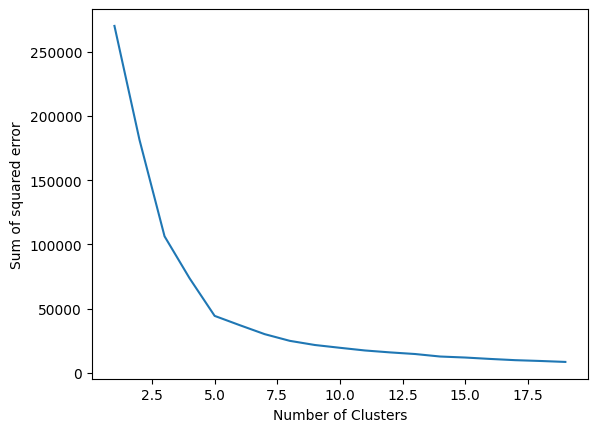

In [20]:
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### With respect to the elbow technique the most appropriate value for K is 5

### APPLYING K MEANS CLUSTERING
---

In [26]:
km.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])

KMeans(n_clusters=5)

In [27]:
df["km_5"] = km.labels_

In [24]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,km_5
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,3,4
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,3,4
4,5,Female,31,17,40,4,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,3
196,197,Female,45,126,28,0,1
197,198,Male,32,126,74,2,3
198,199,Male,32,137,18,0,1


### GROUPS:

In [15]:
y_group = km.fit_predict(df[['Spending Score (1-100)', 'Annual Income (k$)']])
y_group

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [32]:
df['cluster'] = y_group


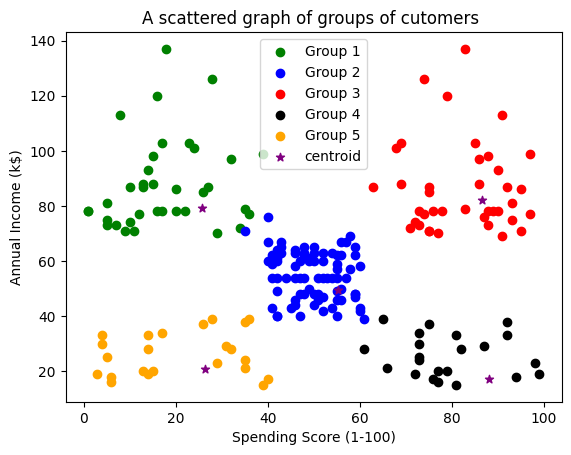

In [48]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'],color='green', label='Group 1')
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],color='blue', label='Group 2')
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'],color='red', label='Group 3')
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],color='black', label='Group 4')
plt.scatter(df5['Spending Score (1-100)'],df5['Annual Income (k$)'],color='orange', label='Group 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.title('A scattered graph of groups of cutomers ')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend()

### CREATING MULTIPLE CLUSTERS


In [41]:
for k in range(1, 6):
    km=KMeans(n_clusters=k)
    km.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    df[f'km_{k}'] = km.labels_

In [38]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,km_5,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,1,Male,19,15,39,4,4,0,1,1,0,4
1,2,Male,21,15,81,3,3,0,0,1,2,0
2,3,Female,20,16,6,4,4,0,1,1,0,4
3,4,Female,23,16,77,3,3,0,0,1,2,0
4,5,Female,31,17,40,4,4,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1,0,0,0,1,1
196,197,Female,45,126,28,0,2,0,1,2,3,3
197,198,Male,32,126,74,2,1,0,0,0,1,1
198,199,Male,32,137,18,0,2,0,1,2,3,3


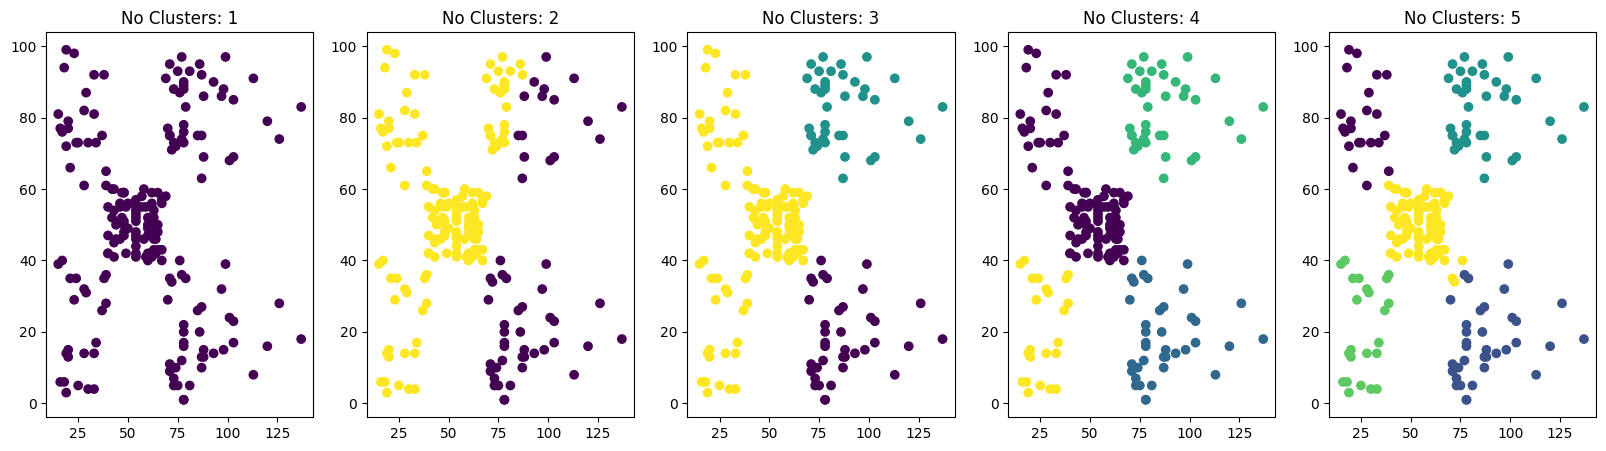

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes,start=1):
    ax.scatter(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], c=df[f'km_{i}'])
    ax.set_title(f'No Clusters: {i}')
    
